<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/0913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 파일 사용
# 첫번째 방법은 제공된 file system에 데이터 파일을 업로드하고 사용
# 속도 빠름, 데이터 영구저장 X, 리소스 반납하면 데이터 사라짐

# 두번째 방법은 파일을 구글 드라이브에 저장하고 사용하는 방식 (내가 하는 방식)
# 이 방식은 속도는 느림, 하지만 데이터 영구 저장



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Weight : [[2.4287033]], bias : [-146.99549097]
[[3.58411393]]


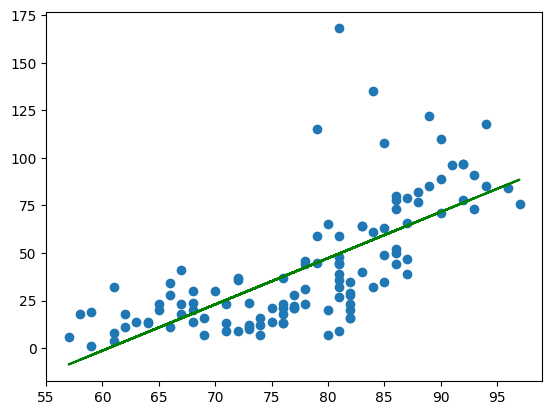

In [ ]:
# sklearn으로 구현
# sklearn은 자동 정규화 된다
# 필요한 module import
import numpy as np
import pandas as pd

from sklearn import linear_model
import matplotlib.pyplot as plt

# Training Data Set
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/ozone.csv')
# display(df)

training_data = df[['Ozone', 'Temp']]
# display(training_data)

# NaN은 결측치
# 결측치는 연산 X
# 방법은 두가지, 하나는 결측치 삭제, 또 다른 방법은 보정

training_data = training_data.dropna(how = 'any')
# display(training_data)
# 153행이 116행으로 변경(37행 삭제)

# 독립변수, feature, 입력데이터
# DataFrame에서 Temp라는 속성값만 추출해서 이값을 numpy array(1차원)으로 변경한우 다시 2차원으로 변경
x_data = training_data['Temp'].values.reshape(-1, 1)
# print(x_data)

# [1 2 3 4 5 6 ] => 1차원
# reshape(2, 3), reshape(3, 2), reshape(-1, 3) -1는 상관하지 않겠다는 뜻, (-1, 3) 행은 상관말고 3열로 나열하라는 뜻

# 종속변수, target, label, 정답
t_data = training_data['Ozone'].values.reshape(-1, 1)
# print(t_data)

# sklearn 모델 생성
sklearn_model = linear_model.LinearRegression()

# 만들어진 모델 학습
sklearn_model.fit(x_data, t_data)

# 회기계수 출력 W, b 출력
print('Weight : {}, bias : {}'.format(sklearn_model.coef_, sklearn_model.intercept_)) # W : sklearn_model.coef_  , b : sklearn_model.intercept_
# Weight : [[2.4287033]], bias : [-146.99549097]

# 학습된 모델을 이용해서 예측 작업을 수행
sklearn_predict = sklearn_model.predict([[62]])
print(sklearn_predict) # [[3.58411393]]

# 그래프를 이용해서 우리의 모델이 데이터를 잘 표현하고 있는지 확인
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*sklearn_model.coef_ + sklearn_model.intercept_, color = 'g')
plt.show()

[[0.5626083]] [-0.03950141]


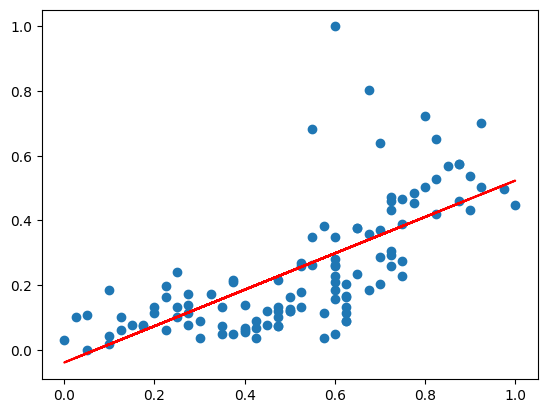

In [19]:
# 같은 데이터를 이용해서 Tensorflow Keras를 이용해서 구현
# keras는 자동 정규화 기능 없어서 직접 해줘야 함
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set 준비
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/ozone.csv')
# display(df)

training_data = df[['Ozone', 'Temp']]
# display(training_data)

# NaN은 결측치
# 결측치는 연산 X
# 방법은 두가지, 하나는 결측치 삭제, 또 다른 방법은 보정

training_data = training_data.dropna(how = 'any')
# display(training_data)
# 153행이 116행으로 변경(37행 삭제)

# 독립변수, feature, 입력데이터
# DataFrame에서 Temp라는 속성값만 추출해서 이값을 numpy array(1차원)으로 변경한우 다시 2차원으로 변경
x_data = training_data['Temp'].values.reshape(-1, 1)
# print(x_data)

# 종속변수, target, label, 정답
t_data = training_data['Ozone'].values.reshape(-1, 1)

# [1 2 3 4 5 6 ] => 1차원
# reshape(2, 3), reshape(3, 2), reshape(-1, 3) -1는 상관하지 않겠다는 뜻, (-1, 3) 행은 상관말고 3열로 나열하라는 뜻

# TensorFlow Keras Model 생성
keras_model = Sequential()

# input layer
keras_model.add(Flatten(input_shape=(1,))) # input_shape=(1,)에서 ,를 찍는 이유는 파이썬 튜플이라서

# output layer
# Weight와 bias는 여기에 있음
output_layer = Dense(units = 1, activation = 'linear')
keras_model.add(output_layer)

# model 설정
keras_model.compile(optimizer = SGD(learning_rate = 1e-4), loss = 'mse')

# model 학습
keras_model.fit(x_data, t_data, epochs = 2000, verbose = 0) # verbos는 학습 잘하고 있는지 출력하는 것

# model prediction
keras_predict = keras_model.predict([[62]])
print(keras_predict)  # sklearn 에서는 3.5나옴  # keras는 29.7나옴

# keras구현 결과가 이상한거 같음
# 그래프 그려서 확인

# Weight와 bias 구하기
weights, bias = output_layer.get_weights()
print(weights, bias) # [[0.5341257]] [-3.4084742]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*weights + bias, color = 'r')
plt.show()

1/1 [==============================] - 0s 64ms/step
[[3.720115]]
[[0.58051956]] [-0.05627683]


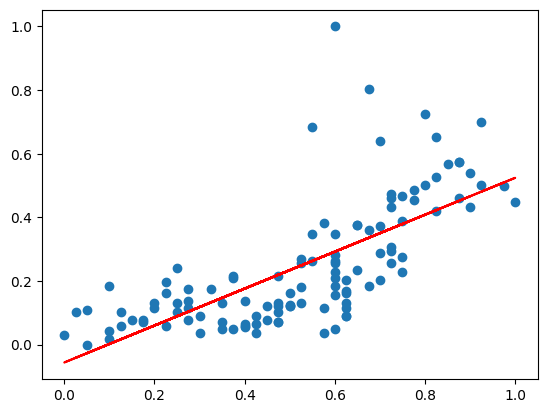

In [22]:
# 정규화 해서 다시 시도

# 같은 데이터를 이용해서 Tensorflow Keras를 이용해서 구현
# keras는 자동 정규화 기능 없어서 직접 해줘야 함
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler

# Training Data Set 준비
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/ozone.csv')
# display(df)

training_data = df[['Ozone', 'Temp']]
# display(training_data)

# NaN은 결측치
# 결측치는 연산 X
# 방법은 두가지, 하나는 결측치 삭제, 또 다른 방법은 보정

training_data = training_data.dropna(how = 'any')
# display(training_data)
# 153행이 116행으로 변경(37행 삭제)

# 독립변수, feature, 입력데이터
# DataFrame에서 Temp라는 속성값만 추출해서 이값을 numpy array(1차원)으로 변경한우 다시 2차원으로 변경
x_data = training_data['Temp'].values.reshape(-1, 1)
# print(x_data)

# 종속변수, target, label, 정답
t_data = training_data['Ozone'].values.reshape(-1, 1)

# [1 2 3 4 5 6 ] => 1차원
# reshape(2, 3), reshape(3, 2), reshape(-1, 3) -1는 상관하지 않겠다는 뜻, (-1, 3) 행은 상관말고 3열로 나열하라는 뜻

# 정규화 진행
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

# print(x_data_norm, t_data_norm)

# TensorFlow Keras Model 생성
keras_model = Sequential()

# input layer
keras_model.add(Flatten(input_shape=(1,))) # input_shape=(1,)에서 ,를 찍는 이유는 파이썬 튜플이라서

# output layer
# Weight와 bias는 여기에 있음
output_layer = Dense(units = 1, activation = 'linear')
keras_model.add(output_layer)

# model 설정
keras_model.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'mse')

# model 학습
keras_model.fit(x_data_norm, t_data_norm, epochs = 2000, verbose = 0) # verbos는 학습 잘하고 있는지 출력하는 것

# model prediction
predict_data = np.array([[62]])  # 62의 값 스케일링
predict_data_norm = scaler_x.transform(predict_data)

keras_predict = keras_model.predict(predict_data_norm)
# 이렇게 얻은 keras_predict는 당연히 scale이 된 상황에서 예측값
result = scaler_t.inverse_transform(keras_predict)

print(result)  # sklearn 에서는 3.5나옴  # keras는 29.7나옴 # 정규화를 거친 값은 3.7 나옴

# keras구현 결과가 이상한거 같음
# 그래프 그려서 확인

# Weight와 bias 구하기
weights, bias = output_layer.get_weights()
print(weights, bias) # [[0.58051956]] [-0.05627683]

plt.scatter(x_data_norm, t_data_norm)
plt.plot(x_data_norm, x_data_norm*weights + bias, color = 'r')
plt.show()